In [1]:
import pandas as pd

# Import numpy
import numpy as np
import seaborn as sns
# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# Import datasets for use
from sklearn import datasets
import mlflow

## Tareas No Supervisadas

In [2]:
iris = datasets.load_iris()
iris_df =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["class"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


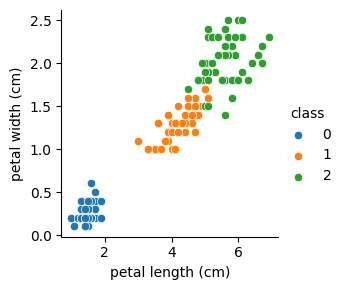

In [3]:
g=sns.FacetGrid(iris_df,hue="class")
g.map(sns.scatterplot, "petal length (cm)", "petal width (cm)").add_legend()

In [4]:
y= iris_df["class"]
X = iris_df.drop("class",axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=123)

In [6]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler 

In [7]:
preprocessing = Pipeline(
    steps=[
        ("preprocess",StandardScaler())
    ]
)

# K-means

In [15]:
from sklearn.cluster import KMeans

In [37]:
kmeans= KMeans(n_clusters=3,max_iter=300, tol=1e-4,init='k-means++',n_init=5,random_state=123)

In [38]:
X_transform= preprocessing.fit_transform(X_train)
X_test_transform = preprocessing.transform(X_test)

In [39]:
modelkmeans =kmeans.fit(X_transform)
y_km = modelkmeans.predict(X_transform)

In [45]:
modelkmeans.cluster_centers_

array([[-0.12566288, -0.8777322 ,  0.29048007,  0.23817887],
       [-1.05366838,  0.89273205, -1.36688869, -1.30676516],
       [ 1.10973085,  0.11778497,  0.95210597,  0.95271549]])

In [41]:
y_test_m = modelkmeans.predict(X_test_transform)

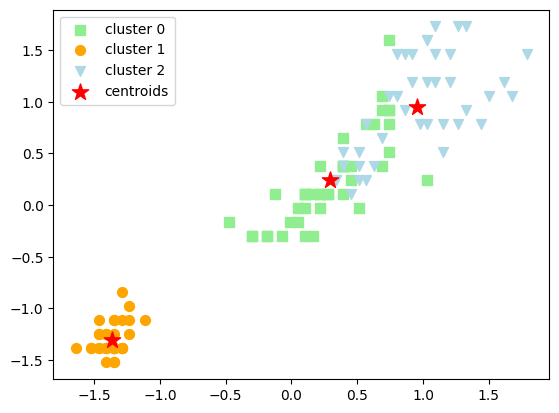

In [46]:
plt.scatter(X_transform[y_km==0,2], X_transform[y_km==0,3], s=50, c="lightgreen", marker='s', label='cluster 0')
plt.scatter(X_transform[y_km==1,2], X_transform[y_km==1,3], s=50, c="orange", marker='o', label='cluster 1')
plt.scatter(X_transform[y_km==2,2], X_transform[y_km==2,3], s=50, c="lightblue", marker='v', label='cluster 2')
plt.scatter(modelkmeans.cluster_centers_[:,2],modelkmeans.cluster_centers_[:,3], s=150, marker="*",c='red', label="centroids")
plt.legend()

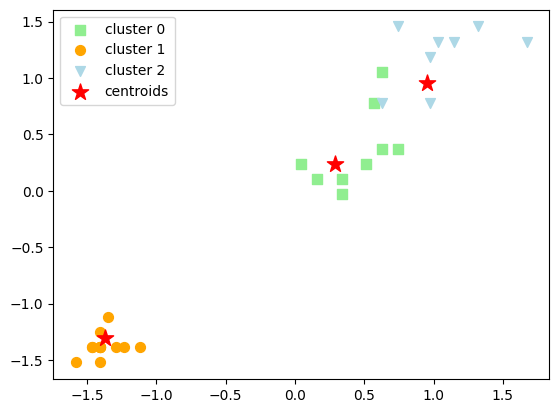

In [48]:
plt.scatter(X_test_transform[y_test_m==0,2], X_test_transform[y_test_m==0,3], s=50, c="lightgreen", marker='s', label='cluster 0')
plt.scatter(X_test_transform[y_test_m==1,2], X_test_transform[y_test_m==1,3], s=50, c="orange", marker='o', label='cluster 1')
plt.scatter(X_test_transform[y_test_m==2,2], X_test_transform[y_test_m==2,3], s=50, c="lightblue", marker='v', label='cluster 2')
plt.scatter(modelkmeans.cluster_centers_[:,2],modelkmeans.cluster_centers_[:,3], s=150, marker="*",c='red', label="centroids")
plt.legend()

Text(0, 0.5, 'ELbow')

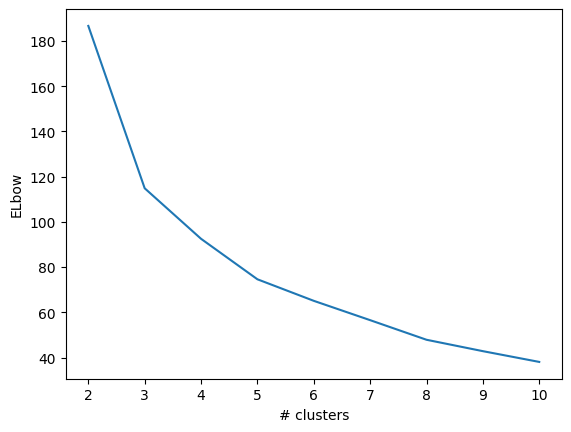

In [53]:
wcc=[]
for i in range(2,11):
    kmeans_= KMeans(n_clusters=i, max_iter=300, tol=1e-4,n_init=5)
    y_km= kmeans_.fit_predict(X_transform)
    wcc.append(kmeans_.inertia_)

plt.plot(range(2,11),wcc)
plt.xlabel("# clusters")
plt.ylabel("ELbow")

# hierarchical clustering

In [54]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

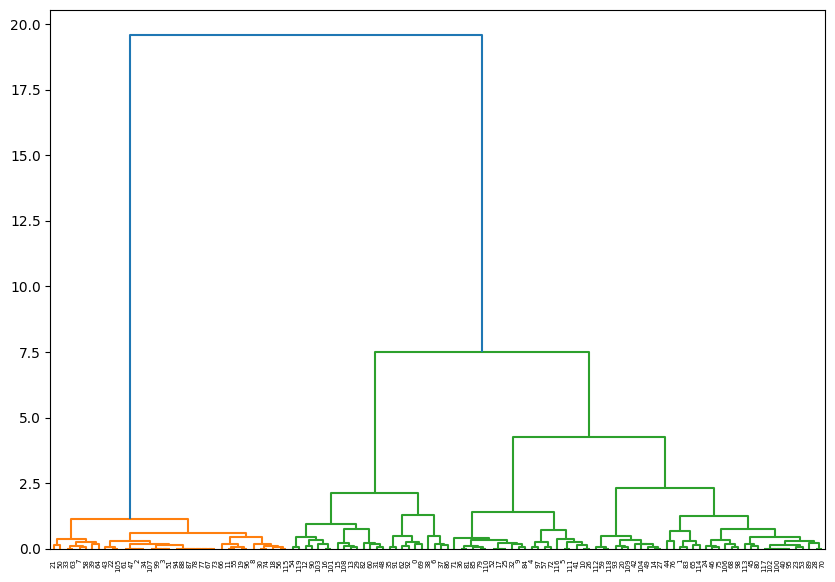

In [56]:
plt.figure(figsize=(10,7))
linkage_method =linkage(X_transform[:,2:],method="ward",metric='euclidean')
Deplot= dendrogram(linkage_method)

# Mixtura gaussianas

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl

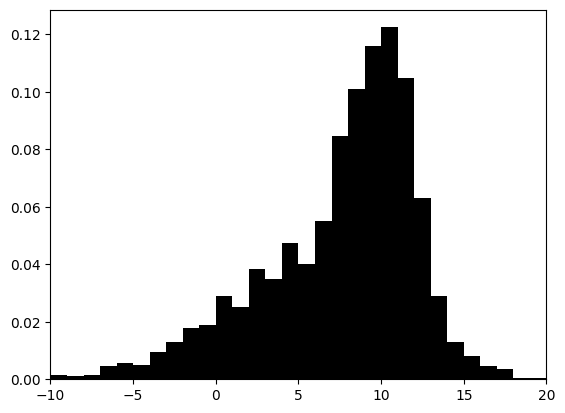

In [58]:
x = np.concatenate((np.random.normal(5, 5, 1000), np.random.normal(10, 2, 1000)))
x = x.reshape(-1, 1)
plt.hist(x, density=True,color='black', bins=np.arange(-100, 100, 1))
plt.xlim(-10, 20)

bics = []
min_bic = 0
counter=1
for i in range (1,10): 
  gmm = GMM(n_components = counter, max_iter=1000, random_state=0, covariance_type = 'full')
  labels = gmm.fit(x).predict(x)
  bic = gmm.bic(x)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = counter
  counter = counter + 1

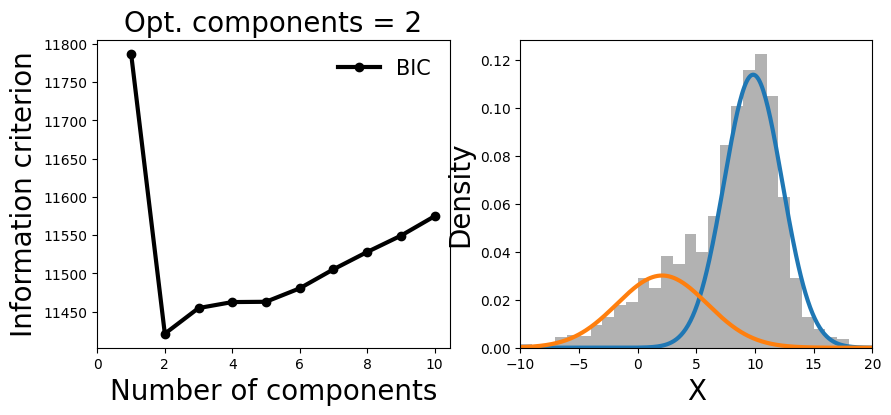

In [59]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot 1
plt.plot(np.arange(1,11), bics, 'o-', lw=3, c='black', label='BIC')
plt.legend(frameon=False, fontsize=15)
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Information criterion', fontsize=20)
plt.xticks(np.arange(0,11, 2))
plt.title('Opt. components = '+str(opt_bic), fontsize=20)



n_optimal = opt_bic

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')


mean = gmm.fit(x).means_  
covs  = gmm.fit(x).covariances_
weights = gmm.fit(x).weights_


x_axis = np.arange(-20, 30, 0.1)
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

ax = fig.add_subplot(1,2,2)

plt.hist(x, density=True,color='black', bins=np.arange(-100, 100, 1),alpha=0.3)
plt.plot(x_axis, y_axis0, lw=3, c='C0')
plt.plot(x_axis, y_axis1, lw=3, c='C1')

plt.xlim(-10, 20)

plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.show()
plt.close('all')

In [85]:
pipelinegmm =Pipeline(
    steps=[
("preprocessing",preprocessing),
("gmm", GMM(n_components=3,covariance_type='full',max_iter=500))

    ]
)
pipelinegmm.fit(X_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocess', StandardScaler())])),
                ('gmm', GaussianMixture(max_iter=500, n_components=3))])

In [86]:
print(pipelinegmm["gmm"].means_,pipelinegmm["gmm"].covariances_)

[[ 0.08269968 -0.5766896   0.2131534   0.09506588]
 [-1.05366838  0.89273205 -1.36688869 -1.30676516]
 [ 0.83093535 -0.23114575  0.97912713  1.03752965]] [[[0.43752933 0.3146022  0.14310116 0.10347922]
  [0.3146022  0.50174583 0.13920234 0.1492202 ]
  [0.14310116 0.13920234 0.07163201 0.05377084]
  [0.10347922 0.1492202  0.05377084 0.06511404]]

 [[0.16127537 0.27404733 0.00929806 0.01557213]
  [0.27404733 0.7783093  0.01320295 0.03911354]
  [0.00929806 0.01320295 0.00912934 0.0051323 ]
  [0.01557213 0.03911354 0.0051323  0.02227671]]

 [[0.59417641 0.2406983  0.21841581 0.08402021]
  [0.2406983  0.60540399 0.09934051 0.1841345 ]
  [0.21841581 0.09934051 0.10912694 0.05097287]
  [0.08402021 0.1841345  0.05097287 0.15861916]]]


In [74]:
pipelinegmm["gmm"].aic(pipelinegmm["preprocessing"].transform(X_test))

226.8549851046405

In [75]:
pipelinegmm["gmm"].bic(pipelinegmm["preprocessing"].transform(X_test))

288.5076698977754

In [77]:
for i in range(1,10):
    pipelinegmm =Pipeline(
    steps=[
    ("preprocessing",preprocessing),
    ("gmm", GMM(n_components=i,covariance_type='full',max_iter=50))]
    )
    pipelinegmm.fit(X_train)
    print(pipelinegmm["gmm"].aic(X_test_transform),pipelinegmm["gmm"].bic(X_test_transform))

239.94956964574945 259.56633298901966
192.1597342039114 232.7944582721139
226.85250122376044 288.5051860168953
268.2587984333825 350.9294439514496
305.3195356040054 409.0081418470049
349.8373140802583 474.54388104819014
386.82843488263006 532.5529625754942
473.32005637426244 640.0625447920589
463.66506151606393 651.4255106587927


In [87]:
y_test_m= pipelinegmm.predict(X_test)

In [88]:
y_test_m

array([2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 1])

In [81]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip
colors = ['navy', 'turquoise', 'darkorange']

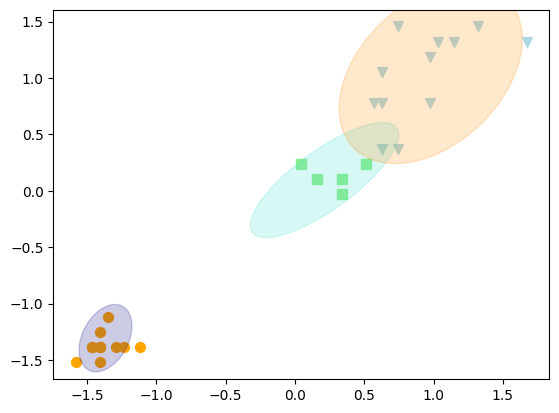

In [93]:
plt.scatter(X_test_transform[y_test_m==0,2], X_test_transform[y_test_m==0,3], s=50, c="lightgreen", marker='s', label='cluster 0')
plt.scatter(X_test_transform[y_test_m==1,2], X_test_transform[y_test_m==1,3], s=50, c="orange", marker='o', label='cluster 1')
plt.scatter(X_test_transform[y_test_m==2,2], X_test_transform[y_test_m==2,3], s=50, c="lightblue", marker='v', label='cluster 2')
plot_cov_ellipse(pipelinegmm["gmm"].covariances_[1,2:,2:],pipelinegmm["gmm"].means_[1,2:],col=colors[0])
plot_cov_ellipse(pipelinegmm["gmm"].covariances_[0,2:,2:],pipelinegmm["gmm"].means_[0,2:],col=colors[1])
plot_cov_ellipse(pipelinegmm["gmm"].covariances_[2,2:,2:],pipelinegmm["gmm"].means_[2,2:],col=colors[2])

# PCA

https://distill.pub/2016/misread-tsne/

https://projector.tensorflow.org/

https://umap-learn.readthedocs.io/en/latest/index.html

https://pair-code.github.io/understanding-umap/

### API
https://github.com/flask-api/flask-api
https://engineering.rappi.com/serve-your-first-model-with-scikit-learn-flask-docker-df95efbbd35e



In [8]:
from sklearn.decomposition import PCA

In [18]:
pipeline_pca  =Pipeline(steps=[
    ("prepro",preprocessing),
    ("pca",PCA(n_components=2))
])


In [19]:
pipeline_pca.fit(X_train)

Pipeline(steps=[('prepro', Pipeline(steps=[('preprocess', StandardScaler())])),
                ('pca', PCA(n_components=2))])

In [26]:
X_predict_pca =pipeline_pca.transform(X_test)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

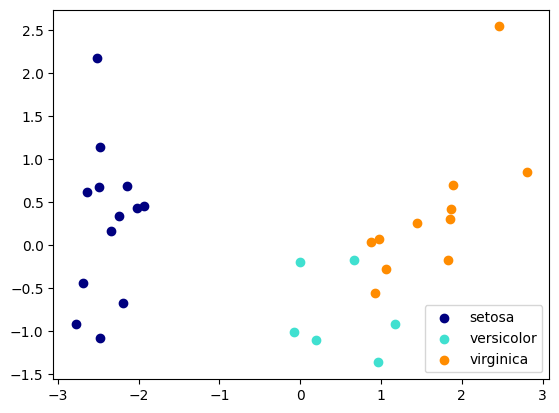

In [35]:
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_predict_pca[y_test==i,0],X_predict_pca[y_test==i,1],color=color, label=target_name)
plt.legend()

In [77]:
from keras.datasets import mnist

In [78]:
(X_train_mnist,y_train_mnist),(X_test_mnist,y_test_mnist)  =mnist.load_data()

In [79]:
subset=1000
X_train_mnist = X_train_mnist[:subset]
y_train_mnist = y_train_mnist[:subset]
X_test_mnist = X_test_mnist[:subset]
y_test_mnist = y_test_mnist[:subset]

In [80]:
X_train_mnist.shape

(1000, 28, 28)

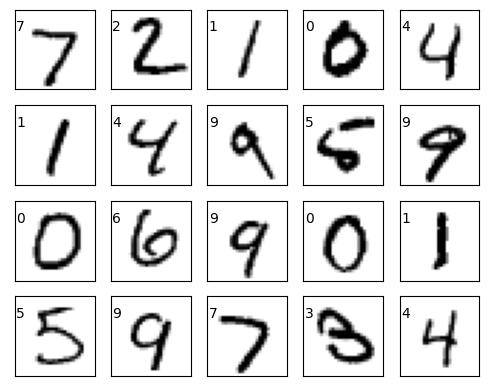

In [81]:
fig =plt.figure(figsize=(6,6))
for i in range(20):
    ax= fig.add_subplot(5,5,i+1, xticks=[], yticks=[])
    ax.imshow(X_test_mnist[i],cmap=plt.cm.binary)
    ax.text(0,7,str(y_test_mnist[i]))

In [82]:
X_train_mnist=X_train_mnist.reshape(subset,784)
X_test_mnist=X_test_mnist.reshape(subset,784)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_mnist = scaler.fit_transform(X_train_mnist)
X_test_mnist = scaler.transform(X_test_mnist)


In [97]:
pca =PCA(n_components=256)
pca.fit(X_train_mnist)

PCA(n_components=256)

In [98]:
pca.n_components_

256

In [99]:
train_img = pca.transform(X_train_mnist)
test_img = pca.transform(X_test_mnist)

In [100]:
train_img.shape

(1000, 256)

In [107]:
sum(pca.explained_variance_ratio_)

0.9749012915251796

In [102]:
train_reconstruction =pca.inverse_transform(train_img)
test_reconstruction =pca.inverse_transform(test_img)

In [103]:
train_reconstruction.shape


(1000, 784)

In [104]:
test_reconstruction_img =test_reconstruction.reshape(subset, 28,28)

In [105]:
test_reconstruction_img.shape

(1000, 28, 28)

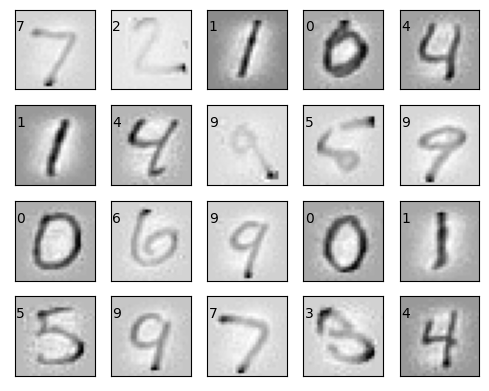

In [106]:
fig =plt.figure(figsize=(6,6))
for i in range(20):
    ax= fig.add_subplot(5,5,i+1, xticks=[], yticks=[])
    ax.imshow(test_reconstruction_img[i],cmap=plt.cm.binary)
    ax.text(0,7,str(y_test_mnist[i]))

## Model de clasificacion MNIST para mlflow 

In [108]:
from sklearn.neural_network import MLPClassifier

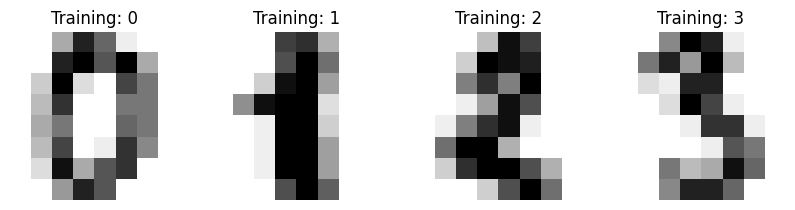

In [110]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [116]:
n_samples =len(digits.images)
data=digits.images.reshape((n_samples,-1))
n_samples

1797

In [121]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2,random_state=123)

In [122]:
clf=MLPClassifier(hidden_layer_sizes=[32,32],activation='relu', alpha=0.01,max_iter=500)
clf.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=[32, 32], max_iter=500)

In [123]:
predicted =clf.predict(X_test)

In [130]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [127]:
reporte =classification_report(y_test,predicted)
print(reporte)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.87      1.00      0.93        34
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        33
           4       0.98      0.98      0.98        42
           5       1.00      0.92      0.96        37
           6       1.00      0.93      0.96        43
           7       0.94      1.00      0.97        31
           8       1.00      0.89      0.94        37
           9       1.00      1.00      1.00        28

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



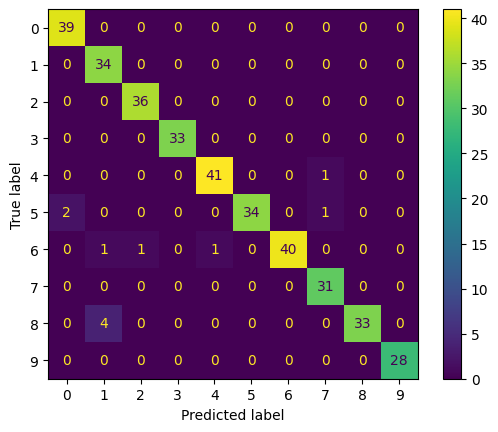

In [129]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [131]:
accuracy_score(y_test,predicted)

0.9694444444444444

In [132]:
reporte_dict =classification_report(y_test,predicted,output_dict=True)

In [139]:
reporte_dict["0"]

{'precision': 0.9512195121951219,
 'recall': 1.0,
 'f1-score': 0.975,
 'support': 39}